In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# roc curve and auc score
from sklearn.datasets import make_classification

In [3]:
X, y=make_classification(n_samples=2000, n_classes=2,weights=[1,1],random_state=1)

#weight-> ratio of each classification 

In [4]:
X.shape

(2000, 20)

In [5]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [6]:
y.shape

(2000,)

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.3, random_state=1)

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score

# Random Forests

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)

ytrain_pred=rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))

ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9821833333333333


In [10]:
ytrain_pred

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.04, 0.96],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.26, 0.74]])

In [11]:
ytrain_pred.shape

(1400, 2)

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(X,y)

ytrain_pred=lr_model.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))

ytest_pred=lr_model.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.986187501403087
Logistic test roc-auc: 0.9896111111111111


# Adaboost Classifier

In [19]:
from sklearn.ensemble import AdaBoostClassifier

ad_model=AdaBoostClassifier()
ad_model.fit(X,y)

ytrain_pred=ad_model.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))

ytest_pred=ad_model.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

C:\Users\ritti\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost train roc-auc: 0.9959652320144656
Adaboost test roc-auc: 0.9961666666666666


# KNNClassifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn_classi=KNeighborsClassifier()
knn_classi.fit(X,y)
ytrain_pred = knn_classi.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classi.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9825180462498291
Adaboost test roc-auc: 0.9809444444444445


No we will focus on selecting the best threshold for maximum accuracy

In [22]:
pred=[]

for model in [rf_model,lr_model,ad_model,knn_classi]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_pred=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_pred)))

Ensemble test roc-auc: 0.9928333333333333


In [23]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.99,0.991391,0.539880,1.0
1,0.02,0.000005,0.471156,0.0
2,0.96,0.981407,0.540894,0.8
3,0.89,0.761936,0.510777,1.0
4,0.57,0.863992,0.502735,0.6
...,...,...,...,...
595,0.01,0.023175,0.458542,0.4
596,0.01,0.000001,0.439260,0.0
597,1.00,0.986670,0.527995,1.0
598,0.00,0.000807,0.457724,0.2


In [24]:
final_pred

0      0.880318
1      0.122790
2      0.820575
3      0.790678
4      0.634182
         ...   
595    0.222929
596    0.112315
597    0.878666
598    0.164633
599    0.878608
Length: 600, dtype: float64

In [25]:
# Calculate the ROc Curve
fpr, tpr, thresholds = roc_curve(y_test,final_pred)

thresholds

array([       inf, 0.92099228, 0.81695628, 0.81678055, 0.7969132 ,
       0.79517175, 0.73737928, 0.73691304, 0.71064237, 0.70866688,
       0.70216149, 0.69552691, 0.62575134, 0.62336754, 0.60964302,
       0.60880506, 0.60075167, 0.60017794, 0.57003335, 0.53641326,
       0.52187713, 0.47907308, 0.47820278, 0.47038237, 0.44126309,
       0.32388427, 0.3194553 , 0.30337044, 0.30305088, 0.29731936,
       0.29302252, 0.26263975, 0.26155299, 0.17720989, 0.17684662,
       0.10738664])

In [26]:
thresholds.shape

(36,)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_pred>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)

In [29]:
accuracy_ls
#upper most value have most accurecy and the corres value 
#of threshold is the required threshold

,thresholds,accuracy
19,0.536413,0.968333
18,0.570033,0.966667
20,0.521877,0.966667
17,0.600178,0.966667
15,0.608805,0.965000
24,0.441263,0.965000
16,0.600752,0.965000
21,0.479073,0.963333
14,0.609643,0.963333
23,0.470382,0.963333


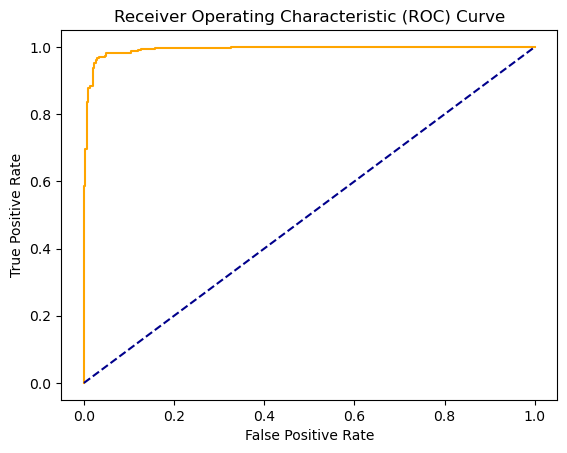

In [33]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()